In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [3]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
max(train_Y)

9

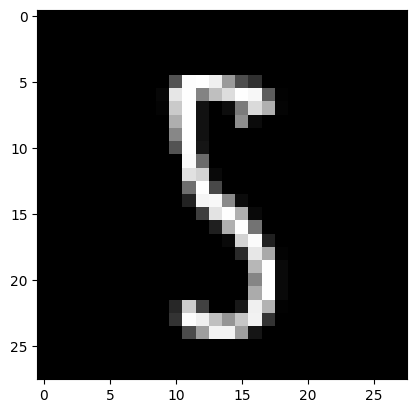

5


In [5]:
plt.imshow(train_X[502], cmap = 'gray')
plt.show()
print(train_Y[502])

In [6]:
from keras.utils import to_categorical

In [7]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [8]:
print(train_Y[502])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
print(np.max(train_X[5685]))

255


In [10]:
train_X = train_X / 255
test_X = test_X / 255

In [11]:
print(np.max(train_X[502]))

1.0


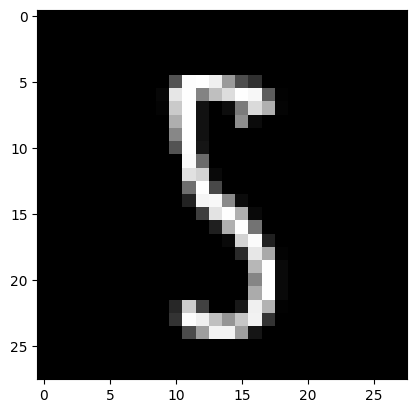

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
plt.imshow(train_X[502], cmap = 'gray')
plt.show()
print(train_Y[502])

In [13]:
print(train_X.shape)

(60000, 28, 28)


In [14]:
from keras.models import Sequential
import keras
from keras.layers import Dense

In [15]:
model = Sequential(name = 'Ronaldo')

In [16]:
model.add(keras.layers.Flatten())
model.add(Dense(630, input_dim = (28 * 28), activation = 'relu', name = 'Layer_1'))
model.add(Dense(490, activation = 'relu', name = 'Layer_2'))
model.add(Dense(350, activation = 'relu', name = 'Layer_3'))
model.add(Dense(250, activation = 'relu', name = 'Layer_4'))
model.add(Dense(100, activation = 'relu', name = 'Layer_5'))
model.add(Dense(10, activation = 'softmax', name = 'Layer_6'))

In [17]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
model.build((None, 784))
model.summary()

Model: "Ronaldo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Layer_1 (Dense)             (None, 630)               494550    
                                                                 
 Layer_2 (Dense)             (None, 490)               309190    
                                                                 
 Layer_3 (Dense)             (None, 350)               171850    
                                                                 
 Layer_4 (Dense)             (None, 250)               87750     
                                                                 
 Layer_5 (Dense)             (None, 100)               25100     
                                                                 
 Layer_6 (Dense)             (None, 10)                1010

In [20]:
hist = model.fit(train_X, train_Y, epochs = 100, batch_size = 200, validation_split = 0.1)

Epoch 1/100
270/270 [==============================] - 6s 23ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.1136 - val_accuracy: 0.9795
Epoch 2/100
270/270 [==============================] - 6s 23ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0952 - val_accuracy: 0.9837
Epoch 3/100
270/270 [==============================] - 6s 22ms/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 0.0954 - val_accuracy: 0.9805
Epoch 4/100
270/270 [==============================] - 6s 23ms/step - loss: 0.0091 - accuracy: 0.9976 - val_loss: 0.0821 - val_accuracy: 0.9833
Epoch 5/100
270/270 [==============================] - 6s 23ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0927 - val_accuracy: 0.9818
Epoch 6/100
270/270 [==============================] - 6s 24ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.1057 - val_accuracy: 0.9817
Epoch 7/100
270/270 [==============================] - 6s 22ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0884 - val_accuracy:

270/270 [==============================] - 6s 21ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.1307 - val_accuracy: 0.9848
Epoch 58/100
270/270 [==============================] - 6s 22ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.1081 - val_accuracy: 0.9852
Epoch 59/100
270/270 [==============================] - 6s 21ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.1107 - val_accuracy: 0.9865
Epoch 60/100
270/270 [==============================] - 6s 21ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1106 - val_accuracy: 0.9863
Epoch 61/100
270/270 [==============================] - 6s 21ms/step - loss: 2.4223e-04 - accuracy: 0.9999 - val_loss: 0.1100 - val_accuracy: 0.9870
Epoch 62/100
270/270 [==============================] - 6s 21ms/step - loss: 2.6409e-05 - accuracy: 1.0000 - val_loss: 0.1162 - val_accuracy: 0.9870
Epoch 63/100
270/270 [==============================] - 6s 21ms/step - loss: 5.8947e-06 - accuracy: 1.0000 - val_loss: 0.1169 - val_acc

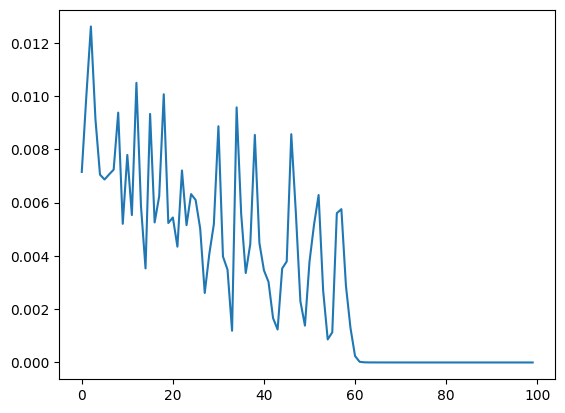

In [21]:
plt.plot(hist.history['loss'])

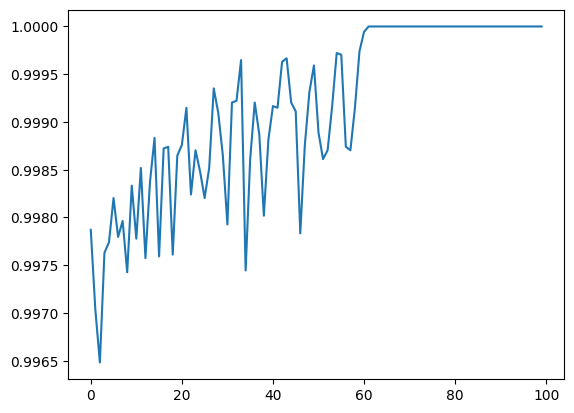

In [22]:
plt.plot(hist.history['accuracy'])

In [23]:
preds = model.predict(test_X)

313/313 [==============================] - 1s 3ms/step


In [24]:
for i in range(len(preds)):
    print(preds[i], test_Y[i])

[8.0924594e-34 1.0668930e-30 2.6811730e-25 2.3120756e-31 4.0726145e-38
 1.4902738e-38 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.1139679e-28] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[2.1356960e-38 1.3462796e-36 1.0000000e+00 5.4497558e-32 1.0361475e-33
 1.2205609e-37 0.0000000e+00 1.5963764e-28 0.0000000e+00 0.0000000e+00] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[6.5221491e-34 1.0000000e+00 1.3364930e-18 6.8263810e-24 7.9652918e-20
 1.2259821e-24 1.2816109e-18 2.9037364e-22 1.2256806e-20 3.0708312e-30] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 1.7560650e-31 3.4875020e-26 6.1189698e-30 1.9173894e-19
 3.6571587e-33 1.7041250e-20 1.3713579e-34 1.4270221e-32 9.3897066e-27] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[8.6455542e-19 4.9930069e-18 3.2557624e-17 1.3681059e-22 1.0000000e+00
 1.5032419e-21 2.3135943e-15 3.3972283e-18 2.0498098e-22 1.5034170e-17] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 3.3947290e-25 1.4006813e-32 1.4892437e-25
 2.4383685e-33 5.0543920e-24 4.4310159e-29 5.0915201e-

[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 8.1447904e-36 0.0000000e+00 0.0000000e+00] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0000000e+00 1.5970521e-21 6.5055474e-20 1.0000000e+00 1.4936427e-31
 5.4322870e-22 0.0000000e+00 1.2633289e-21 2.2891042e-20 2.7522097e-25] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2.69256428e-37 1.59882505e-37 2.70884134e-30 1.69688680e-26
 8.48386599e-34 1.00465046e-28 0.00000000e+00 1.95157568e-36
 1.00000000e+00 5.26647872e-37] [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.0000000e+00 1.0000000e+00 6.3035421e-27 2.3738185e-34 2.0693202e-27
 1.0866393e-34 7.4823018e-27 6.4943778e-31 2.3610458e-29 0.0000000e+00] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.4469334e-28 5.2385713e-28 1.0000000e+00 3.9604978e-22 7.0534950e-27
 2.5730874e-30 7.4858855e-38 2.5068730e-24 1.2437282e-29 4.1358913e-33] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[6.0839978e-34 2.2491011e-32 3.0641480e-31 0.00000

[4.05706430e-07 9.90025163e-01 1.99801638e-04 8.43955604e-06
 1.16960528e-05 3.44849650e-05 2.77674495e-04 1.79479230e-06
 9.44053568e-03 1.04651265e-08] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 2.0557030e-25 5.3459796e-32 1.0797755e-27
 3.6544812e-33 9.2120937e-28 5.2893663e-31 1.4487993e-30 0.0000000e+00] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 2.3090156e-25 9.5925673e-33 2.7797910e-25
 1.6092549e-33 3.4445876e-24 2.5941812e-28 4.4057046e-27 1.3842637e-38] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[7.7011904e-21 3.4782124e-20 1.0000000e+00 1.4557741e-15 3.2236750e-20
 4.0906936e-22 1.5838324e-28 6.6792955e-17 1.0469289e-21 8.4533167e-24] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0.0000000e+00 5.7604957e-35 7.1585263e-29 1.1250991e-36 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.6593824e-34] [0. 0. 0. 0. 0. 0.

 5.5798702e-38 4.2513437e-30 1.7525088e-34 3.9862883e-33 0.0000000e+00] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.3466114e-12 1.0027295e-11 1.2612077e-10 2.7941484e-14 1.0000000e+00
 7.2853893e-14 4.7465210e-10 7.3780261e-12 6.4153686e-14 3.2365045e-11] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[4.9225143e-21 2.8954436e-20 1.6778659e-19 2.7303649e-25 3.8767068e-19
 1.0519787e-18 1.0000000e+00 1.8229502e-30 1.0381727e-19 1.0188634e-31] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[7.5114300e-23 1.5108785e-26 8.9964039e-19 5.1840147e-16 4.1065736e-17
 5.2206859e-17 3.0198764e-32 7.6305267e-17 1.2698112e-16 1.0000000e+00] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[8.9260773e-36 2.9615188e-35 6.5899976e-27 2.7988130e-27 1.1711130e-31
 6.2165718e-27 0.0000000e+00 3.0486017e-34 1.0000000e+00 3.5766179e-38] [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.0000000e+00 1.0000000e+00 9.4768307e-26 1.7917643e-33 1.9365756e-26
 1.7206401e-33 5.4852297e-26 3.1870394e-29 6.1839290e-28 0.00

 1.0041130e-15 1.4382004e-36 1.2569579e-16 1.3259274e-15 8.7667361e-20] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[7.7481129e-26 2.8820474e-25 5.3142822e-24 2.3848138e-31 3.8372387e-23
 2.6424289e-23 1.0000000e+00 2.6816577e-37 1.5138223e-24 1.3207426e-38] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[5.7271099e-33 2.3940904e-33 3.6780883e-26 5.0257066e-24 1.8748651e-29
 1.7336934e-24 9.1496034e-38 1.1365114e-31 1.0000000e+00 9.4218581e-34] [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.0000000e+00 1.0000000e+00 7.9411621e-30 1.1767020e-38 3.6221348e-30
 0.0000000e+00 8.7890975e-29 1.0548600e-33 5.2321500e-32 0.0000000e+00] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.9727876e-28 1.6306357e-26 7.2288428e-26 1.6168357e-33 7.1159050e-25
 2.2387015e-24 1.0000000e+00 0.0000000e+00 3.3914397e-26 0.0000000e+00] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[4.2642227e-38 7.6685957e-35 4.6426129e-32 0.0000000e+00 1.0000000e+00
 0.0000000e+00 1.8848616e-29 2.8865753e-36 0.0000000e+00 2.99

 0.0000000e+00 1.4315663e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.7842366e-38 1.0000000e+00 3.4202913e-21 3.2538340e-27 1.1465885e-23
 1.4922675e-27 2.3084301e-21 2.8065659e-26 1.2033673e-22 1.4499068e-35] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0.0000000e+00 4.9460712e-32 3.3813867e-35 1.0000000e+00 0.0000000e+00
 6.5915111e-33 0.0000000e+00 8.1488929e-36 5.5564982e-33 2.0227703e-37] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[4.8644671e-33 3.8546414e-29 1.2714957e-27 1.7575953e-36 1.0000000e+00
 4.1413317e-36 7.4078999e-25 1.7548671e-30 4.2362566e-37 1.2569687e-29] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.08597265e-33 1.49647300e-29 7.28596350e-24 8.45212506e-31
 1.88775467e-36 5.46058434e-37 0.00000000e+00 1.00000000e+00
 0.00000000e+00 2.50745938e-29] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0.0000000e+00 0.0000000e+00 1.8658651e-32 6.9683839e-30 7.1934579e-36
 4.8655112e-31 0.0000000e+00 0.0000000e+00 1.00000

 1.0000000e+00 5.6571218e-20 1.4349095e-25 1.2580551e-18 4.7767876e-19] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 5.1845957e-28 7.2042228e-36 2.4873662e-30
 2.2937610e-37 2.3935292e-29 4.0287084e-34 4.0009614e-32 0.0000000e+00] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.4752069e-27 1.2771437e-13 2.0127349e-13 1.0000000e+00 5.5753679e-20
 2.1689712e-13 1.1730318e-30 3.8844145e-14 8.3178316e-13 2.5476833e-15] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1.1029059e-33 4.9650133e-17 2.8978252e-16 1.0000000e+00 8.3093135e-25
 1.0049939e-16 1.6275380e-37 2.1395281e-16 1.0344395e-14 7.3605109e-20] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.0000000e+00 0.0000000e+00 1.4817688e-33 5.7335512e-28 8.7188091e-28
 3.4105556e-30 0.0000000e+00 8.2909954e-29 5.3033302e-30 1.0000000e+00] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[2.4974868e-19 1.5969517e-17 3.4029549e-14 3.4355172e-18 1.0248404e-21
 6.1371117e-22 1.6845133e-30 1.0000000e+00 5.3766028e-22 2.4175226e-16] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[8.1256971e-23 1.9420

 7.9523562e-13 1.0000000e+00 8.6482500e-21 2.5807180e-13 1.2543872e-21] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0.0000000e+00 1.2541857e-37 0.0000000e+00 1.0000000e+00 0.0000000e+00
 7.7692561e-38 0.0000000e+00 0.0000000e+00 4.4978730e-38 0.0000000e+00] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[8.7898531e-25 3.0991699e-22 1.0000000e+00 3.6378063e-17 2.1872135e-20
 1.9482953e-21 2.2032975e-30 1.1828307e-17 4.8707475e-24 7.7661335e-26] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[5.9716314e-33 4.0384064e-32 3.1727227e-31 0.0000000e+00 2.7318907e-29
 5.5299082e-29 1.0000000e+00 0.0000000e+00 1.5516926e-30 0.0000000e+00] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0.0000000e+00 4.7999038e-30 3.5018506e-31 1.0000000e+00 0.0000000e+00
 7.1552194e-30 0.0000000e+00 2.6053627e-32 5.6026910e-31 3.0555274e-35] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1.4338236e-21 5.8806404e-11 1.2621351e-12 1.0000000e+00 4.5893871e-15
 7.9590869e-11 6.1069560e-24 2.4718385e-12 2.0967910e-11 4.51

 5.4368349e-34 0.0000000e+00 6.1024255e-28 1.3251762e-34 2.1149411e-38] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2.5619050e-13 9.8254694e-13 4.0877122e-08 8.6466563e-12 1.6747783e-14
 3.5557774e-15 3.0370130e-22 1.0000000e+00 2.3463107e-15 6.9135596e-12] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.0538338e-34 1.7116635e-27 1.2192601e-26 1.4932587e-34 1.0000000e+00
 1.5389783e-36 2.2288425e-24 1.2993891e-30 9.2271751e-37 1.5118389e-29] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[7.3715881e-11 9.8249554e-11 1.0000000e+00 5.6424632e-10 9.8960760e-09
 7.6084021e-11 7.4270868e-13 2.9618969e-09 9.8853883e-11 6.3212894e-12] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[5.7319180e-33 0.0000000e+00 2.0755814e-27 2.1832674e-23 6.5291528e-24
 3.4994059e-24 0.0000000e+00 2.4144346e-24 4.8363654e-24 1.0000000e+00] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.0000000e+00 5.3148350e-37 1.0000000e+00 3.0199096e-33 8.7887057e-34
 0.0000000e+00 0.0000000e+00 2.2214594e-30 0.0000000e+00 0.0000000e+00] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2.81272990e-25 3.103

[5.7322244e-33 5.0189855e-30 2.4607448e-28 2.4317060e-20 2.4503019e-27
 1.0000000e+00 8.1582117e-24 1.8445574e-31 9.1354788e-23 3.8318832e-24] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.8253699e-37
 3.5770545e-38 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[8.1963152e-35 6.8693433e-34 3.0814891e-28 3.4124794e-24 4.6063080e-32
 6.4773227e-26 0.0000000e+00 4.2283684e-34 1.0000000e+00 3.0430477e-34] [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.0000000e+00 0.0000000e+00 5.3311714e-33 1.8269481e-28 7.7843326e-29
 2.4103517e-29 0.0000000e+00 2.0491379e-29 4.5438531e-29 1.0000000e+00] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.0979654e-35
 0.0000000e+00 3.4387488e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00000000e+00 1.00000000e+00 3.55558594e-31 0.00000000e+00


[1.0047739e-19 2.4212163e-22 6.9523961e-16 2.0882876e-13 2.0186633e-13
 8.6941766e-14 9.0158119e-27 4.5445984e-14 8.6964486e-14 1.0000000e+00] 9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


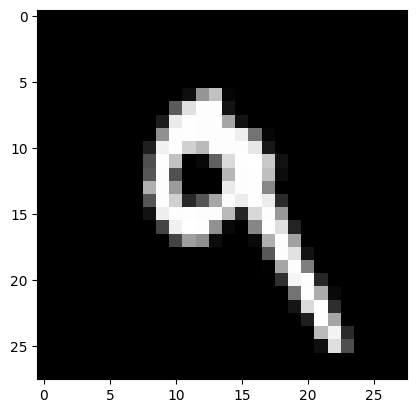

In [29]:
plt.imshow(test_X[7], cmap = 'gray')
print(preds[7], np.argmax(preds[7]))
print(test_Y[7])